# K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data= pd.read_csv("bezdekIris.csv")
print(data.head())

   sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [3]:
selected_data= data[['sepal length','sepal width','petal length','petal width']]
print(selected_data)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


## Aplicamos K-means

In [5]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, random_state=0)
kmeans.fit(selected_data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Comparacion de los cluster con la clasificación del dataset

In [6]:
data['cluster'] = kmeans.labels_
data.groupby(['class', 'cluster']).agg({'sepal length': 'count'})

sepal length
class cluster              
0     1                  50
1     0                  47
      2                   3
2     0                  14
      2                  36

In [7]:
from sklearn.decomposition import PCA

class_labels = data['class']
selected_data = data.drop(columns=['class'])

pca = PCA(2)
pca_res = pca.fit_transform(selected_data)
data['class'] = class_labels
data['X'] = pca_res[:, 0]
data['Y'] = pca_res[:, 1]
data.head()

,sepal length,sepal width,petal length,petal width,class,cluster,X,Y
0,5.1,3.5,1.4,0.2,0,1,-2.656689,0.498591
1,4.9,3.0,1.4,0.2,0,1,-2.689075,0.295216
2,4.7,3.2,1.3,0.2,0,1,-2.862871,0.330895
3,4.6,3.1,1.5,0.2,0,1,-2.720725,0.247470
4,5.0,3.6,1.4,0.2,0,1,-2.700990,0.508987


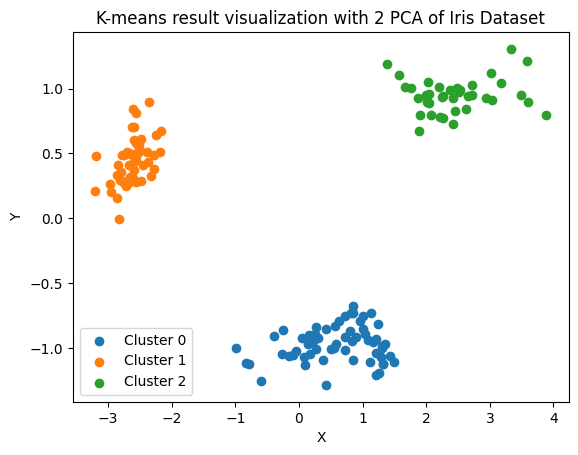

In [8]:
cluster_0 = data[data['cluster']==0]
cluster_1 = data[data['cluster']==1]
cluster_2 = data[data['cluster']==2]

plt.scatter(cluster_0['X'], cluster_0['Y'], label ='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label ='Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], label ='Cluster 2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means result visualization with 2 PCA of Iris Dataset')
plt.show()